___
# PROJETO 1

## <font color='red'>Caue Citrini Lacava</font>
___

## <font color='blue'>Análise comparativa entre as condições de Aposentados brancos, pretos e pardos</font>

## Apresentação

A heterogêneo presente na classe de aposentados se da diante de diversos fatores, ocupação, renda média, qualidade de vida, qualidade estudo, cor de pele entre outros. Diante de tantos fatores, a comparação feita entre negros e brancos desta classe foi a abordada nesta pesquisa pois diversas outras pesquisas já fazeram análises da relação da cor da pele dos entrevistados com o rendimento dos mesmos. A classe de aposentados embora não estejam mais participando da PEA (População economicamente ativa) não estão incentos de diferenciação de rendimento pelo preconceito racial, ja que o valor pago na aposentadoria é resultado de uma séria de critérios relacionados as ocupaçõs anteriores.

Em uma pesquisa realizada pela revista Metal (link: http://metalrevista.com.br/2016/05/09/cresce-o-numero-de-aposentados-que-voltam-ao-mercado-de-trabalho-no-brasil/) as ferramentas utilizadas para analisar a classe de aposentados foram de análise quanto ao cresimento desta classe estabelecendo uma comparação temporal, análise dos dados que compoem a renda dos aposentados permitindo melhor percepção do estilo de vida, análise dos custos de vida, análise do cenário atual brasileiro e de que forma os aposentados lidam com a situação econômica entre outras ferramentas gráficas como um gráfico de dispersão.

___
## Análise e Resultados

In [71]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import arange

In [44]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\vannieresb\Documents\DADOS


In [45]:
estrutura = pd.read_table("pes_py.txt", sep=";")
pnad2014 = pd.read_fwf("PES2014.zip", widths=estrutura.Tamanho, header=None, compression="zip")
pnad2014.columns = estrutura.iloc[:,0]

In [108]:
#Criando DataFrame
tabela = pd.DataFrame()

tabela["aposentado"] = pnad2014.V9122
tabela["cor_da_pele"] = pnad2014.V0404
tabela["alfabetizado"] = pnad2014.V0601
tabela["curso_mais_elevado"] = pnad2014.V6007
tabela["quantia_aposent"] = pnad2014.V1252



tabela.V19122 = pnad2014.V9122.astype('category')
tabela.V19122.cat.categories = ("Aponsetado","Não Aposentado")

tabela.cor_da_pele = pnad2014.V0404.astype('category')
tabela.cor_da_pele.cat.categories = ("Branco", "Preto", "Amarelo", "Pardo", "Indígena", "Sem declaração")

tabela.alfabetizado = pnad2014.V0601.astype("category")
tabela.alfabetizado.cat.categories = ("Sim", "Não")

tabela.curso_mais_elevado = pnad2014.V6007.astype('category')
tabela.curso_mais_elevado.cat.categories = ('Elementar', 'Médio 1o ciclo', 'Médio 2o ciclo', 'Regular do E.F.',
                                              'Regular do E.M.', 'Supletivo do E.F.', 'Supletivo do E.M.', 'ensino superior',
                                              'Mestrado/doutorado', 'Alfabetização (jovens/adultos)', 'Creches', 
                                              'Classe de alfabetização', 'Maternal/jardim') 



___
### Gráfico Aposentados x Cor da Pele

Para iniciar a análise, foi realizada uma comparação entre as frequências relativas de cada classe de cor de pele dentro da classe dos aposentados. Com esse gráfico foi possivel identificar que mais de 50% dos aposentados entrevistados são brancos, seguido pelos indígenas com um pouco menos de 40%, restando apenas aproximadamente 10% para as classes de negros, pardos, amarelos e sem declarações.

C:\Users\vannieresb\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\tools\plotting.py:968: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


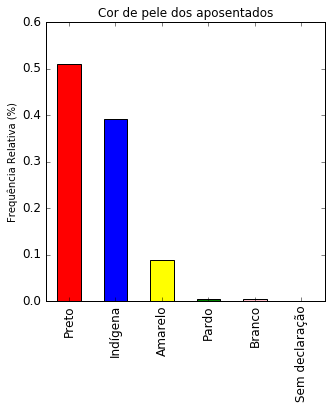

In [109]:
aposentados = tabela[(pnad2014["V9122"] == 2)]
plot = aposentados.cor_da_pele.value_counts(True).plot.bar(title='Cor de pele dos aposentados',figsize=(5,5), fontsize=12, colors= ("red","b","yellow","green","pink"))
plt.ylabel("Frequência Relativa (%)")
plt.show()

___
### Gráfico Cor da Pele x Analfabetismo dos aposentados

Os gráficos abaixo nós permitem identificar a relação existente entre a cor da pele dos aposentados e o analfabetismo. Nota-se que o indice de analfabetismo é expressivamente maior para a classe de negros.

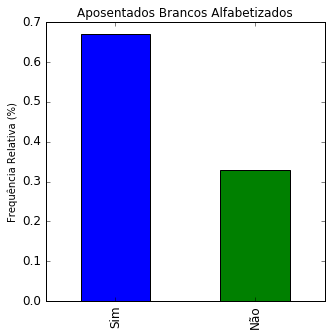

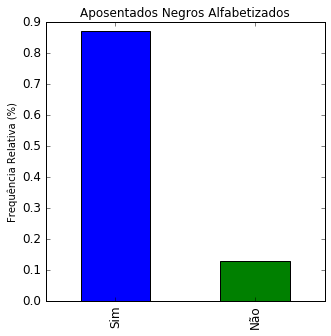

In [110]:
aposent_branco = aposentados[(aposentados.cor_da_pele == "Branco")]
aposent_preto = aposentados[(aposentados.cor_da_pele == "Preto")]


plot = aposent_branco.alfabetizado.value_counts(True).plot.bar(title='Aposentados Brancos Alfabetizados',figsize=(5,5), fontsize=12, color = ("b","green"))
plt.ylabel("Frequência Relativa (%)")
plt.show()

plot = aposent_preto.alfabetizado.value_counts(True).plot.bar(title='Aposentados Negros Alfabetizados',figsize=(5,5), fontsize=12, color = ("b","green"))
plt.ylabel("Frequência Relativa (%)")
plt.show()

___
### Gráfico Cor da Pele x Curso mais elevado dos aposentados

Esta análise permite identificar a diferença quanto a qualidade da escolariadade das classes comparadas.

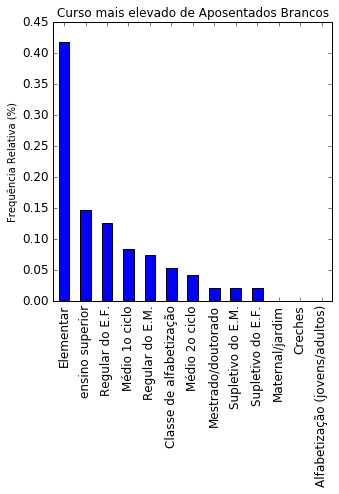

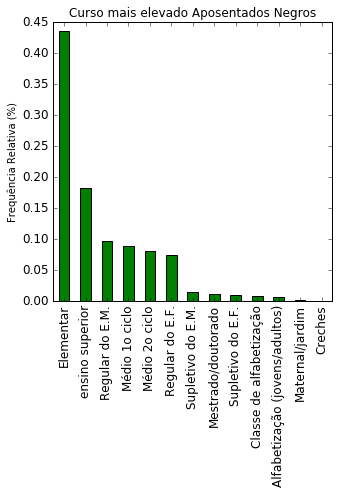

In [115]:
plot = aposent_branco.curso_mais_elevado.value_counts(True).plot.bar(title='Curso mais elevado de Aposentados Brancos',figsize=(5,5), fontsize=12, color="b")
plt.ylabel("Frequência Relativa (%)")
plt.show()

plot = aposent_preto.curso_mais_elevado.value_counts(True).plot.bar(title='Curso mais elevado Aposentados Negros',figsize=(5,5), fontsize=12, color="green")
plt.ylabel("Frequência Relativa (%)")
plt.show()

___
## Conclusão 

O histograma abaixo estabelece uma comparação entre as quantias recebidas de aposentadoria de brancos e negros. Diante deste e de todos os outros gráficos apresentados, a diferenciação entre a classe de aposentados negros e brancos é perceptivel em todas as variáveis analisadas, quanto ao indice de alfabetização, quanto a qualidade de ensino, resultando e esclarecendo o cenário racial segregador brasileiro.

### Histograma de Rendimento da aposentadoria

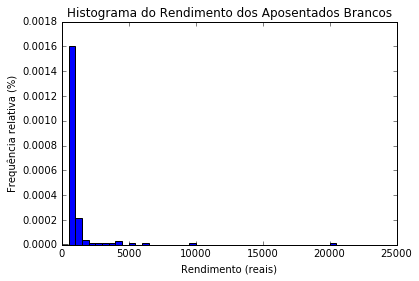

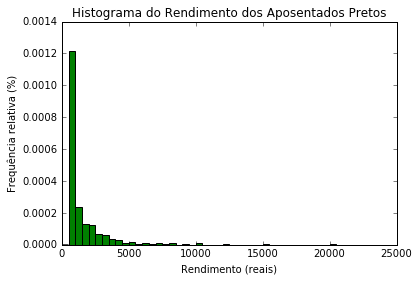

In [112]:
faixa = arange(0,22000,500)

plot = aposent_branco.quantia_aposent.plot.hist(bins=faixa, normed=1, color="blue")
plt.title("Histograma do Rendimento dos Aposentados Brancos")
plt.xlabel("Rendimento (reais)")
plt.ylabel("Frequência relativa (%)")
plt.show()

plot = aposent_preto.quantia_aposent.plot.hist(bins=faixa, normed=1, color="green")
plt.title("Histograma do Rendimento dos Aposentados Pretos")
plt.xlabel("Rendimento (reais)")
plt.ylabel("Frequência relativa (%)")
plt.show()

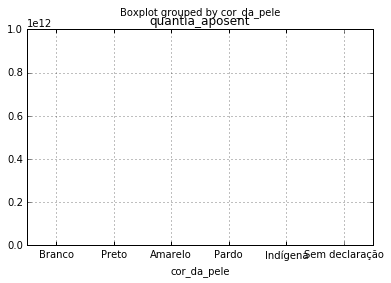

In [113]:
aposentados.boxplot(column="quantia_aposent", by="cor_da_pele")
plt.show()